In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('C:/Users/davin/Downloads/서울시강서구공공와이파이서비스위치정보.csv', encoding='cp949')
df.head()

,관리번호,자치구,와이파이명,도로명주소,상세주소,설치위치(층),설치유형,설치기관,서비스구분,망종류,설치년도,실내외구분,wifi접속환경,X좌표,Y좌표,작업일자
0,BS100171,강서구,버스정류소_KBS스포츠월드,등촌동 665-13,16-009,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.850464,37.556602,58:16.0
1,BS100172,강서구,버스정류소_KBS스포츠월드,화곡동 1136-1,16-010,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.849236,37.556910,58:16.0
2,BS100173,강서구,버스정류소_KT가양지사,강서로 442,16-223,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.840440,37.564820,58:16.0
3,BS100174,강서구,버스정류소_KT가양지사,가양동 1070답,16-224,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.840096,37.564888,58:16.0
4,BS100175,강서구,버스정류소_가로공원.나누리병원,가로공원로 184-2,16-199,NaN,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외,NaN,126.836450,37.536827,58:16.0


In [8]:
df[['관리번호', '와이파이명', '도로명주소', '상세주소', '설치유형', '설치기관','서비스구분', '망종류', '설치년도', '실내외구분']]

,관리번호,와이파이명,도로명주소,상세주소,설치유형,설치기관,서비스구분,망종류,설치년도,실내외구분
0,BS100171,버스정류소_KBS스포츠월드,등촌동 665-13,16-009,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외
1,BS100172,버스정류소_KBS스포츠월드,화곡동 1136-1,16-010,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외
2,BS100173,버스정류소_KT가양지사,강서로 442,16-223,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외
3,BS100174,버스정류소_KT가양지사,가양동 1070답,16-224,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외
4,BS100175,버스정류소_가로공원.나누리병원,가로공원로 184-2,16-199,5.-1 버스정류소(국비),버스정류소(국비),과기부WiFi,임대망,2021,실외
...,...,...,...,...,...,...,...,...,...,...
1586,서울-9136-1,강서등촌지역자활센터,서울시 강서구 양천로335,서울강서등촌지역자활센터 (옥내2),6-1. 복지 - 사회,디지털뉴딜(LG U+),과기부WiFi(복지시설),인터넷망_뉴딜용,2022,실내
1587,서울-9137,강서구립연지노인복지센터,서울시 강서구 화곡로58길 30-7,연지어르신복지센터 (옥내2),6-2. 복지 - 노인,디지털뉴딜(LG U+),과기부WiFi(복지시설),인터넷망_뉴딜용,2022,실내
1588,서울-9137-1,강서구립연지노인복지센터,서울시 강서구 화곡로58길 30-7,연지어르신복지센터 (옥내2),6-2. 복지 - 노인,디지털뉴딜(LG U+),과기부WiFi(복지시설),인터넷망_뉴딜용,2022,실내
1589,서울-9138,강서구립연지노인복지센터,서울시 강서구 화곡로58길 30-7,연지어르신복지센터 (옥내3),6-2. 복지 - 노인,디지털뉴딜(LG U+),과기부WiFi(복지시설),인터넷망_뉴딜용,2022,실내


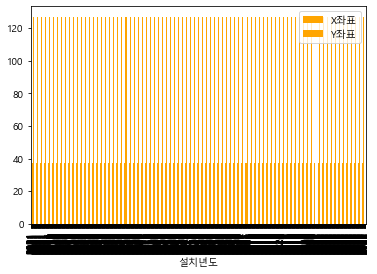

In [23]:
df.plot(kind='bar', x='설치년도',color='orange')
plt.show()

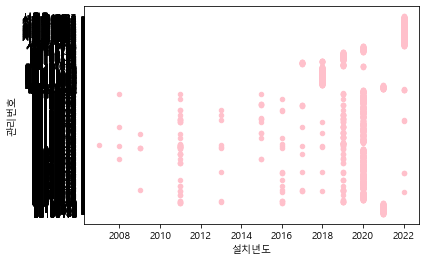

In [30]:
df.plot(kind='scatter', x='설치년도', y='관리번호',color='pink')
plt.show()

In [45]:
wifi_date =df['설치년도']
set(wifi_date)

for i in range(len(set(wifi_date))):
    print(sorted(list(set(wifi_date)))[i], "년 : ", len(df.loc[wifi_date == sorted(list(set(wifi_date)))[i]]),"대")

2007 년 :  1 대
2008 년 :  4 대
2009 년 :  5 대
2011 년 :  53 대
2013 년 :  9 대
2015 년 :  15 대
2016 년 :  19 대
2017 년 :  27 대
2018 년 :  165 대
2019 년 :  191 대
2020 년 :  732 대
2021 년 :  121 대
2022 년 :  249 대


In [48]:
wifi_cate =df['설치유형']
set(wifi_cate)

for i in range(len(set(wifi_cate))):
    print(list(set(wifi_cate))[i], ": ", len(df.loc[wifi_cate == list(set(wifi_cate))[i]]),"대")

nan :  0 대
7-3. 공공 - 지역 :  7 대
6-3. 복지 - 장애인 :  19 대
6-4. 복지 - 아동청소년 :  17 대
1. 주요거리 :  625 대
5-2. 버스정류소(시비) :  33 대
4. 문화체육관광 :  134 대
3. 공원(하천) :  170 대
5.-1 버스정류소(국비) :  88 대
6-1. 복지 - 사회 :  131 대
7-1. 공공 - 행정 :  224 대
2. 전통시장 :  23 대
6-2. 복지 - 노인 :  31 대
7-2. 공공 - 경제/커뮤니티 :  3 대


In [49]:
wifi_off =df['설치기관']
set(wifi_off)

for i in range(len(set(wifi_off))):
    print(list(set(wifi_off))[i], ": ", len(df.loc[wifi_off == list(set(wifi_off))[i]]),"대")

서울시(LTE) :  5 대
디지털뉴딜(LG U+) :  41 대
디지털뉴딜(KT) :  198 대
서울시(AP) :  307 대
자치구에스넷1차 :  623 대
버스정류소(시비) :  33 대
버스정류소(국비) :  88 대
자치구 :  283 대
서울시(공유기) :  9 대
자치구(공유기) :  4 대
